In [3]:
%load_ext autoreload
%autoreload 2
import os.path as osp
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import h5py
from data_utils import *

data_dir = '/home/tau/emenier/data/AirfRANS/Dataset/'
outfile = 'formatted_AirfRANS.h5'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
dataset = H5RansDataset(osp.join(data_dir,outfile))

In [41]:

patchified = to_patches(solution[:2],16)
reassembled = to_img(patchified,dataset.N,dataset.N,16)[0]
reassembled.shape, patchified.shape

(torch.Size([2, 256, 256]), torch.Size([1, 256, 512]))

/tmp/ipykernel_28254/1635812189.py:15: UserWarning: The following kwargs were not used by contour: 'interpolation'
  ola = ax2.contourf(x[0,:], y[:,0], reassembled, 100, cmap=plt.cm.hot,interpolation='bilinear')


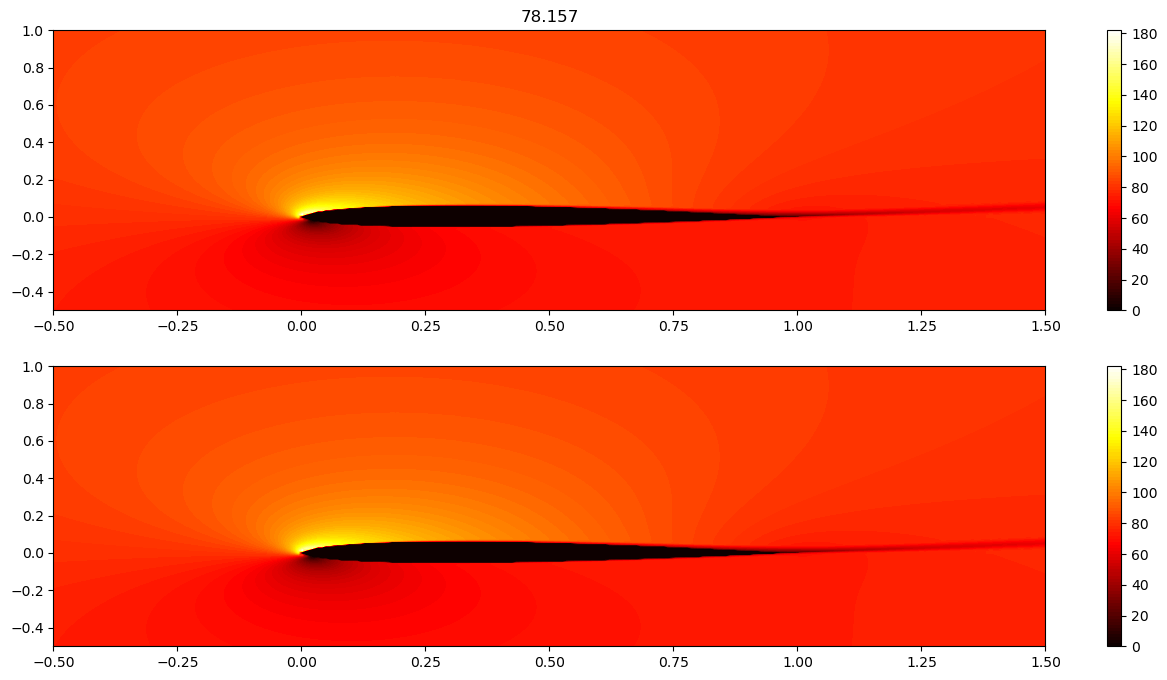

In [46]:
geometry, solution, u_in = dataset[np.random.choice(len(dataset))]
x,y = geometry[0],geometry[1]
geometry = geometry[-1]
uvals = torch.linalg.norm(solution[:2],axis=0)
patchified = to_patches(solution[:2],16)
reassembled = to_img(patchified,dataset.N,dataset.N,16)[0]
reassembled = torch.linalg.norm(reassembled[:2],axis=0)

fig, (ax1,ax2) = plt.subplots(nrows=2,figsize=(16,8))
ax1.set_title(f'{u_in:.3f}')
ola = ax1.contourf(x[0,:], y[:,0], uvals, 100, cmap=plt.cm.hot)
cbar = plt.colorbar(ola)


ola = ax2.contourf(x[0,:], y[:,0], reassembled, 100, cmap=plt.cm.hot,interpolation='bilinear')
cbar = plt.colorbar(ola)

In [13]:
geometry = group['sol']
geometry[:,-1:].shape

(65536, 1)

In [2]:
from dataset import Dataset

/home/tau/emenier/miniconda3/envs/Fin/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
with open(osp.join(root_dir,'manifest.json'), 'r') as f:
    manifest = json.load(f)
manifest_train = manifest['full_train']
train_dataset, coef_norm = Dataset(manifest_train[:10], norm = True, sample = None)

100%|██████████| 10/10 [00:05<00:00,  1.94it/s]


In [9]:
import pyvista as pv
s = manifest_train[0]
internal = pv.read(osp.join(root_dir, s, s + '_internal.vtu'))
aerofoil = pv.read(osp.join(root_dir, s, s + '_aerofoil.vtp'))

In [33]:
aerofoil

PolyData (0x7fb3121fdf00)
  N Cells:    1025
  N Points:   1025
  N Strips:   0
  X Bounds:   -1.884e-03, 1.000e+00
  Y Bounds:   -3.804e-02, 1.271e-01
  Z Bounds:   5.000e-01, 5.000e-01
  N Arrays:   10

In [159]:
dataset.point_data['U'][:,0]

pyvista_ndarray([90.55629 , 90.55629 , 90.54504 , ..., 89.261826,
                 89.27418 , 89.28663 ], dtype=float32)

In [100]:
256**2

65536

/tmp/ipykernel_10464/1497137107.py:29: UserWarning: The following kwargs were not used by contour: 'interpolation'
  ola = ax2.contourf(x[0,:], y[:,0], in_vals, 100, cmap=plt.cm.hot,interpolation='bilinear')


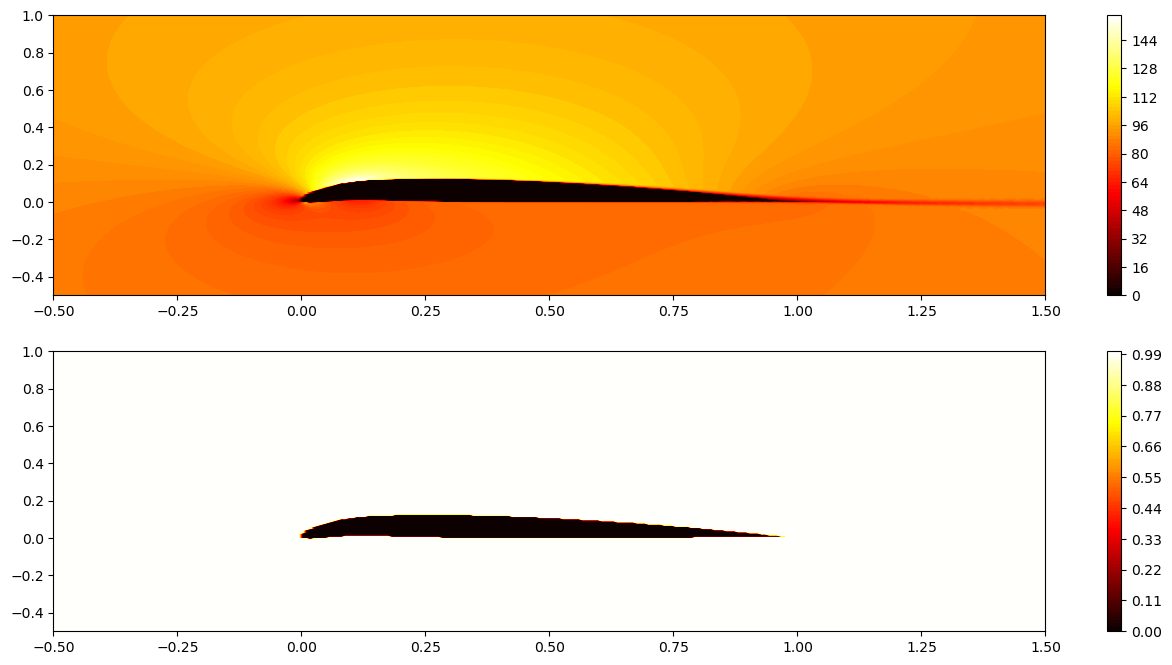

In [154]:
import scipy.interpolate
N = 256
s = manifest_train[np.random.choice(len(manifest_train))]
#s = manifest_train[0]
internal = pv.read(osp.join(root_dir, s, s + '_internal.vtu'))
dataset = internal
xmin, xmax = dataset.points[:,0].min(), dataset.points[:,0].max()
ymin, ymax = dataset.points[:,1].min(), dataset.points[:,1].max()
xcoords = np.linspace(xmin,xmax,N)
ycoords = np.linspace(ymin,ymax,N)
x,y = np.meshgrid(np.linspace(-0.5,1.5,N),np.linspace(-0.5,1,N))
coords = np.concatenate([x.reshape(-1,1),y.reshape(-1,1)],axis=1)
uvals = scipy.interpolate.griddata(\
        (dataset.points[:,0],dataset.points[:,1]),
        np.linalg.norm(dataset.point_data['U'],axis=1),
        coords,method='linear')
uvals = uvals.reshape(N,N)
import copy
in_vals = copy.copy(uvals)
in_vals[in_vals!=0]=1
#in_vals = abs(in_vals-1)

fig, (ax1,ax2) = plt.subplots(nrows=2,figsize=(16,8))

ola = ax1.contourf(x[0,:], y[:,0], uvals, 100, cmap=plt.cm.hot)
cbar = plt.colorbar(ola)


ola = ax2.contourf(x[0,:], y[:,0], in_vals, 100, cmap=plt.cm.hot,interpolation='bilinear')
cbar = plt.colorbar(ola)

In [122]:
import os
lst = os.listdir(root_dir)
n6, n4, nx = 0, 0, 0
for d in lst:
    if not osp.isdir(osp.join(root_dir,d)): 
        print(d)
        continue
    if len(d.split('_')[2:])==5: n4+=1
    elif len(d.split('_')[2:])==6: n6+=1
    else: nx +=1
nx,n4,n6

manifest.json


(0, 489, 511)

In [116]:
lst[0].split('_')

['airFoil2D', 'SST', '31.803', '7.291', '3.243', '6.962', '0.0', '10.641']

In [113]:
lst

['airFoil2D_SST_31.803_7.291_3.243_6.962_0.0_10.641',
 'airFoil2D_SST_84.572_-2.053_5.842_6.436_6.457',
 'airFoil2D_SST_61.863_-0.567_0.289_7.872_0.0_6.693',
 'airFoil2D_SST_91.532_9.129_2.77_4.013_1.0_17.265',
 'airFoil2D_SST_47.087_4.316_3.699_3.87_7.915',
 'airFoil2D_SST_56.3_12.327_1.959_6.913_0.0_15.094',
 'airFoil2D_SST_80.985_6.877_2.735_4.998_9.345',
 'airFoil2D_SST_80.1_10.905_3.705_2.479_18.371',
 'airFoil2D_SST_92.121_3.155_1.986_5.337_10.487',
 'airFoil2D_SST_38.802_5.507_3.497_7.184_1.0_10.971',
 'airFoil2D_SST_64.541_-1.194_0.524_2.116_5.877',
 'airFoil2D_SST_86.895_10.755_1.229_3.979_1.0_9.331',
 'airFoil2D_SST_41.311_-3.941_2.322_4.945_6.189',
 'airFoil2D_SST_42.847_13.708_0.655_3.944_0.0_7.77',
 'airFoil2D_SST_39.497_-4.94_0.473_3.219_1.0_16.447',
 'airFoil2D_SST_89.65_8.631_3.032_3.437_0.0_6.8',
 'airFoil2D_SST_46.0_-0.095_2.322_1.874_16.58',
 'airFoil2D_SST_71.675_1.743_0.955_4.968_15.595',
 'airFoil2D_SST_34.479_6.691_6.72_3.318_15.145',
 'airFoil2D_SST_78.164_-1.09

In [17]:
import vtk
from vtk.util.numpy_support import vtk_to_numpy
reader = vtk.vtkXMLUnstructuredGridReader()
reader.SetFileName(osp.join(root_dir, s, s + '_internal.vtu'))
reader.Update()
data = reader.GetOutput()

In [18]:
reader.GetNumberOfCells()
points = data.GetPoints()
npts = points.GetNumberOfPoints()
x = vtk_to_numpy(points.GetData())

In [29]:
triangles=  vtk_to_numpy(data.GetCells().GetData())
triangles

array([     4,      0,      1, ..., 181792, 181793, 181770])

In [27]:
len([n for n in range(triangles.size) if n%4 != 0]),ntri*3

(676972, 676971)

In [20]:
ntri = triangles.size//4
tri = np.take(triangles,[n for n in range(triangles.size) if n%4 != 0]).reshape(ntri,3)

ValueError: cannot reshape array of size 676972 into shape (225657,3)

In [ ]:
n_arrays = reader.GetNumberOfPointArrays()
for i in range(n_arrays):
    print(reader.GetPointArrayName(i))

In [31]:
x,y = np.meshgrid(np.linspace(0,10,100),np.linspace(0,10,100))

np.concatenate([x.reshape(1,-1),y.reshape(1,-1)],axis=0)
x.reshape(-1)
y.reshape(-1).shape


array([[ 0.       ,  0.1010101,  0.2020202, ...,  9.7979798,  9.8989899,
        10.       ],
       [ 0.       ,  0.       ,  0.       , ..., 10.       , 10.       ,
        10.       ]])